<h1>Differentiate Colorectal carcinoma and para-carcinoma tissue based on expression profile</h1>

<h3>Title: 	Hypoxia-induced cysteine metabolism reprogramming are crucial for the tumorigenesis of colorectal cancer</h3>
<h5>Gene Expression Omnibus: GSE223119</h5>

<b>Data Analyzer:</b> Kai-Wei Chang

<p><b>Data Owner:</b> Shiyi Yang<br>
<b>Email:</b> octoberfirst@sjtu.edu.cn<br>
<b>Affiliation:</b> Shanghai Jiao Tong University, Shanghai, China<br>

<h2>Q1: Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.</h2>

<p><b>Answer:</b><br>
This analysis wil be focused on prediction<br>
By determining whether the gene expresison profiles capable of classifying the sample's origin, future expression profiles of unknown origin may be classified accordingly<br>
In addition, the analysis will compare and contrast the performance of classificaiton tools on low sample, high-dimension data set.<br>
ie. each gene is assumed to be independent feature for this analysis

<h2>Q2: Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.</h2>

<b>Answer:</b><br>
Metabolic reprogramming is a hallmark of human cancer and cancer-specific metabolism provide opportunities for cancer diagnosis, prognosis, and treatment. However, how metabolic pathways affect the initiation and progression of colorectal cancer remain largely unknown.<br>
This data set includes 40 gene expression profiles of cancer and para-carcinoma tissue (tissue surrounding cancer).<br>
This analysis attempt to build a model for predicting the tissue origin of unknown gene profiles

In [1]:
#No warning output
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<h2>Q3: Brief summary of data exploration and actions taken for data cleaning and feature engineering.</h2>

<b>Answer:</b><br>
Data Exploration:
- Raw data is composed of gene ID, gene expression on each sample, gene names, and database and gene network category<br>
- Gene expression has been preprocessed by the data provider, with no missing values<br>
- This data set contain extremely high amount of features (ie. 61,700 genes)<br>

Data Engineering:
- For the project purpose, only gene ID (feature), gene expression, and tissue origin will be considered:
- Removing features that are not expressing or have very low variability among all profiles<br>
- For simplification in this analysis, I randomly selected 3000 features for analysis<br>
- Gene expression may or may not be skewed, and expression levels vary from gene to gene, standardization is applied<br>

<p>Detail analysis see below

In [2]:
#Import Data processing libraries
import numpy as np
import pandas as pd

In [3]:
#Load Data, data is preprocessed
rawData=pd.read_csv(r'C:\Users\kai-w\Desktop\03_Supervised Machine Learning Classification\GSE223119_MJ20190424016-gene.tpm.matrix.annot.txt',sep='\t',header=0)

In [4]:
#Data overview
rawData.head()

,Unnamed: 0,C10,C11,C12,C13,C14,C15,C18,C1,C20,...,cog,cog_description,KO_id,KO_name,paths,pfam,go,nr,swissprot,entrez
0,ENSG00000000003,61.65,37.27,85.58,68.76,32.17,49.63,64.18,10.96,36.86,...,ENOG4111IRY(S:Function unknown),ENOG4111IRY(Tenomodulin),K17295,TSPAN6,NaN,PF00335.17(Tetraspannin:Tetraspanin family),GO:0039532(biological_process:negative regulat...,NP_003261.1(tetraspanin-6 isoform a [Homo sapi...,sp|O43657|TSN6_HUMAN(Tetraspanin-6 OS=Homo sap...,7105.0
1,ENSG00000000005,0.31,3.39,1.34,2.24,0.25,4.48,1.64,0.15,0.89,...,ENOG410YB96(S:Function unknown),ENOG410YB96(Tenomodulin),NaN,NaN,NaN,PF04089.11(BRICHOS:BRICHOS domain),GO:0005737(cellular_component:cytoplasm); GO:0...,XP_006986474.1(PREDICTED: tenomodulin [Peromys...,sp|Q9H2S6|TNMD_HUMAN(Tenomodulin OS=Homo sapie...,64102.0
2,ENSG00000000419,81.96,34.78,56.60,81.13,49.78,121.31,91.79,39.23,41.02,...,COG0463(M:Cell wall/membrane/envelope biogenesis),"COG0463(Glycosyl transferase, family 2)",K00721,DPM1,map00510(N-Glycan biosynthesis),PF00535.23(Glycos_transf_2:Glycosyl transferas...,GO:0019673(biological_process:GDP-mannose meta...,NP_001303964.1(dolichol-phosphate mannosyltran...,sp|O60762|DPM1_HUMAN(Dolichol-phosphate mannos...,8813.0
3,ENSG00000000457,4.98,1.42,2.84,4.01,4.90,3.86,3.63,4.08,3.95,...,ENOG410XQTG(S:Function unknown),ENOG410XQTG(S. cerevisiae),K17542,SCYL3,NaN,PF00069.22(Pkinase:Protein kinase domain); PF0...,GO:0005794(cellular_component:Golgi apparatus)...,XP_003893590.2(protein-associating with the ca...,sp|Q8IZE3|PACE1_HUMAN(Protein-associating with...,57147.0
4,ENSG00000000460,7.14,1.99,2.80,9.40,5.90,4.13,9.92,4.05,4.21,...,ENOG4110VTC(S:Function unknown),ENOG4110VTC(Chromosome 1 open reading frame 112),NaN,NaN,NaN,PF14868.3(DUF4487:Domain of unknown function (...,NaN,XP_005245374.1(uncharacterized protein C1orf11...,sp|Q9NSG2|CA112_HUMAN(Uncharacterized protein ...,55732.0


In [5]:
#Data types for each column
rawData.dtypes

Unnamed: 0          object
C10                float64
C11                float64
C12                float64
C13                float64
C14                float64
C15                float64
C18                float64
C1                 float64
C20                float64
C22                float64
C23                float64
C24                float64
C25                float64
C3                 float64
C4                 float64
C5                 float64
C6                 float64
C7                 float64
C8                 float64
C9                 float64
P10                float64
P11                float64
P12                float64
P13                float64
P14                float64
P15                float64
P18                float64
P1                 float64
P20                float64
P22                float64
P23                float64
P24                float64
P25                float64
P3                 float64
P4                 float64
P5                 float64
P

In [6]:
#Transpose so treat genes as feature, and each profile as independent record
data=rawData.loc[:,rawData.columns.str.match('^C|^P')].rename(index=rawData['Unnamed: 0']).T
data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,MSTRG.9662,MSTRG.9664,MSTRG.9666,MSTRG.9667,MSTRG.9925,MSTRG.9927,MSTRG.9942,MSTRG.9966,MSTRG.9967,MSTRG.9974
C10,61.65,0.31,81.96,4.98,7.14,4.40,15.56,38.45,18.87,12.65,...,0.02,0.00,0.0,0.13,0.37,0.00,0.54,0.96,0.14,0.00
C11,37.27,3.39,34.78,1.42,1.99,3.10,5.15,34.72,11.98,3.12,...,0.10,6.57,0.0,1.17,0.61,1.78,0.14,1.46,0.60,3.58
C12,85.58,1.34,56.60,2.84,2.80,5.31,8.48,29.41,25.83,11.12,...,0.07,0.00,0.0,0.20,0.17,0.50,0.98,1.56,0.07,4.64
C13,68.76,2.24,81.13,4.01,9.40,4.46,14.99,45.74,25.93,13.76,...,0.04,0.00,0.0,0.33,0.75,0.23,1.10,2.13,1.38,0.00
C14,32.17,0.25,49.78,4.90,5.90,2.46,10.40,33.28,17.18,11.91,...,0.27,7.07,0.0,0.36,0.54,0.20,0.42,1.75,0.39,5.30


In [7]:
#Assign tissue types for classification
data['Tissue']=data.index.str[0:1]
data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,MSTRG.9664,MSTRG.9666,MSTRG.9667,MSTRG.9925,MSTRG.9927,MSTRG.9942,MSTRG.9966,MSTRG.9967,MSTRG.9974,Tissue
C10,61.65,0.31,81.96,4.98,7.14,4.40,15.56,38.45,18.87,12.65,...,0.00,0.0,0.13,0.37,0.00,0.54,0.96,0.14,0.00,C
C11,37.27,3.39,34.78,1.42,1.99,3.10,5.15,34.72,11.98,3.12,...,6.57,0.0,1.17,0.61,1.78,0.14,1.46,0.60,3.58,C
C12,85.58,1.34,56.60,2.84,2.80,5.31,8.48,29.41,25.83,11.12,...,0.00,0.0,0.20,0.17,0.50,0.98,1.56,0.07,4.64,C
C13,68.76,2.24,81.13,4.01,9.40,4.46,14.99,45.74,25.93,13.76,...,0.00,0.0,0.33,0.75,0.23,1.10,2.13,1.38,0.00,C
C14,32.17,0.25,49.78,4.90,5.90,2.46,10.40,33.28,17.18,11.91,...,7.07,0.0,0.36,0.54,0.20,0.42,1.75,0.39,5.30,C


In [8]:
#check for presence of empty values
data.isna().values.sum()

0

In [9]:
#huge feature size, reduce by taking randomly 5000 for the purpose of the project
data.shape

(40, 61701)

In [10]:
#some features/genes have low variability, remove those
feature_var=pd.DataFrame([[i, data[i].std()] for i in data.columns[:-1]],
                         columns=['feature', 'std']).set_index('feature')
print(feature_var[feature_var['std']>0].sort_values('std'))

                          std
feature                      
ENSG00000232264      0.001581
ENSG00000228856      0.001581
ENSG00000231051      0.001581
ENSG00000133105      0.001581
ENSG00000156925      0.001581
...                       ...
ENSG00000211890   6428.959034
ENSG00000240040   6780.842254
ENSG00000212907   7435.193295
ENSG00000198804   8216.179258
ENSG00000228253  18410.117553

[41928 rows x 1 columns]


In [11]:
#random select 3000 features/genes that are variable for the project's purpose
features=feature_var[feature_var['std']>0.5].index.to_series().sample(3000).to_list()
data[features].head()

,ENSG00000283050,ENSG00000178971,ENSG00000267530,ENSG00000181274,ENSG00000137414,ENSG00000268621,ENSG00000175309,ENSG00000103047,ENSG00000129226,ENSG00000133818,...,ENSG00000181754,MSTRG.35998,ENSG00000054654,ENSG00000112039,ENSG00000103194,ENSG00000044574,ENSG00000205078,ENSG00000204590,ENSG00000130518,ENSG00000279753
C10,3.51,7.54,0.81,33.93,12.00,0.08,38.41,1.90,61.67,11.94,...,2.31,1.91,22.00,5.00,40.38,138.34,1.28,26.80,0.48,49.96
C11,0.82,8.99,1.85,18.74,4.18,129.29,12.25,2.26,111.31,9.39,...,0.65,12.09,13.21,3.57,14.80,83.54,6.32,39.97,1.39,133.55
C12,2.89,8.23,0.99,36.07,5.21,0.42,19.09,2.71,62.22,12.51,...,2.01,5.18,36.34,2.77,38.12,154.63,0.70,33.94,0.56,50.30
C13,3.47,5.18,0.41,18.03,8.45,0.00,30.69,4.56,64.74,19.50,...,1.16,4.44,20.36,5.89,41.22,146.48,1.40,34.26,0.86,28.45
C14,2.82,10.46,0.75,25.51,14.27,5.83,23.80,3.72,43.10,16.90,...,1.82,8.47,24.61,4.41,35.72,186.42,0.43,22.69,1.38,47.56


array([[<AxesSubplot:title={'center':'ENSG00000283050'}>,
        <AxesSubplot:title={'center':'ENSG00000178971'}>,
        <AxesSubplot:title={'center':'ENSG00000267530'}>,
        <AxesSubplot:title={'center':'ENSG00000181274'}>,
        <AxesSubplot:title={'center':'ENSG00000137414'}>],
       [<AxesSubplot:title={'center':'ENSG00000268621'}>,
        <AxesSubplot:title={'center':'ENSG00000175309'}>,
        <AxesSubplot:title={'center':'ENSG00000103047'}>,
        <AxesSubplot:title={'center':'ENSG00000129226'}>,
        <AxesSubplot:title={'center':'ENSG00000133818'}>]], dtype=object)

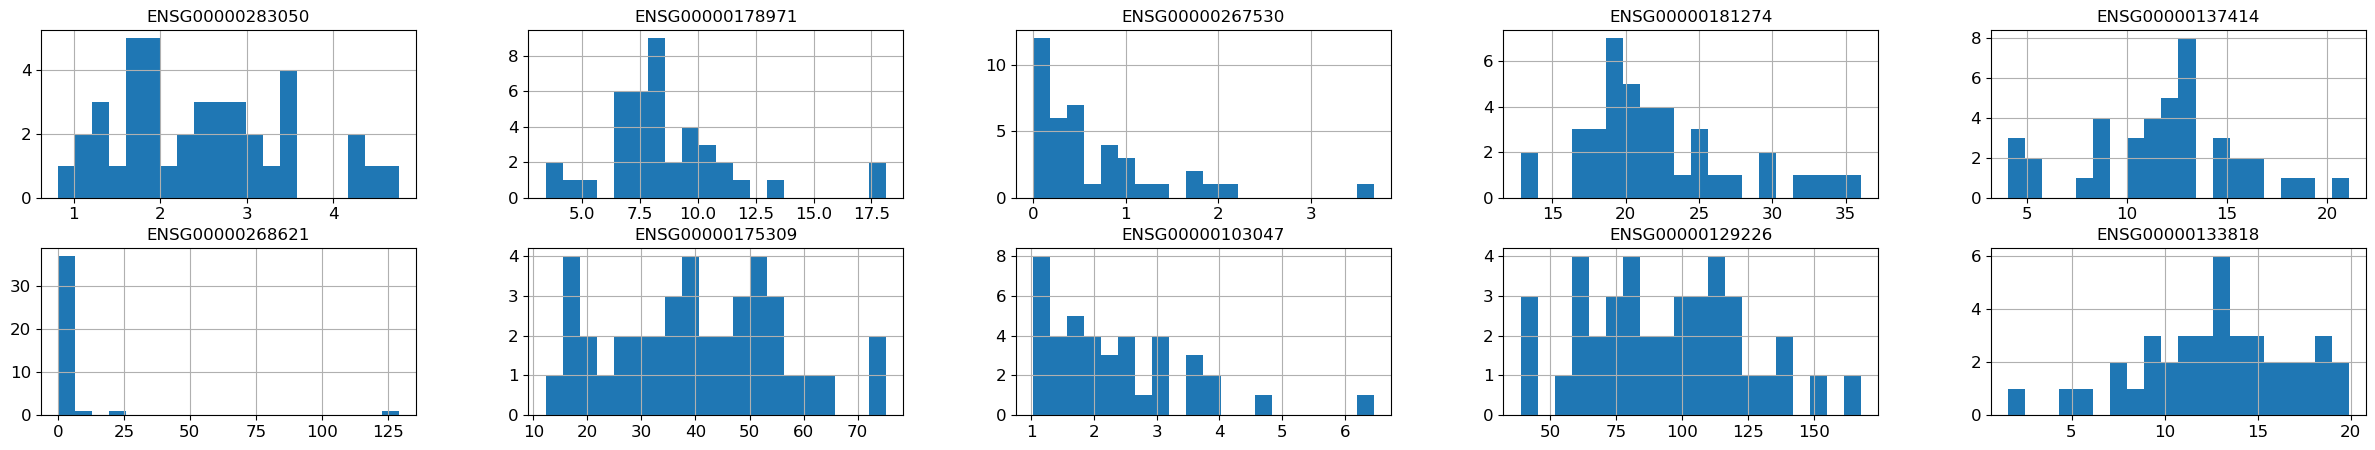

In [12]:
#some features are skwed and some are not, vary dependent on genes
import matplotlib

params = {'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
data[features[0:10]].hist(bins=20,figsize=(30, 5),layout=(2,5))

<h2>Q4: Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.</h2>

<b>Answer:</b><br>
Logistic regression, K-nearest neighbours, SVM, and decision tree are applied<br>
Given only few data record, bagging and boosting may be less suit for this analysis

<h3>Preprocessing</h3>

In [13]:
#Load preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [14]:
#subset of data for standardize and binarize labels
X=pd.DataFrame(StandardScaler().fit_transform(data[features]),columns=features)
Y=pd.DataFrame(LabelBinarizer().fit_transform(data['Tissue']),columns=['Tissue'])
print(X.iloc[:5,:4])
print(Y.head())  #C:0 ; P:1

   ENSG00000283050  ENSG00000178971  ENSG00000267530  ENSG00000181274
0         1.081370        -0.381823         0.206446         2.204380
1        -1.679139         0.113386         1.607449        -0.659688
2         0.445119        -0.146172         0.448927         2.607876
3         1.040322        -1.187818        -0.332401        -0.793558
4         0.373284         0.615425         0.125619         0.616793
   Tissue
0       0
1       0
2       0
3       0
4       0


array([[<AxesSubplot:title={'center':'ENSG00000283050'}>,
        <AxesSubplot:title={'center':'ENSG00000178971'}>,
        <AxesSubplot:title={'center':'ENSG00000267530'}>,
        <AxesSubplot:title={'center':'ENSG00000181274'}>,
        <AxesSubplot:title={'center':'ENSG00000137414'}>],
       [<AxesSubplot:title={'center':'ENSG00000268621'}>,
        <AxesSubplot:title={'center':'ENSG00000175309'}>,
        <AxesSubplot:title={'center':'ENSG00000103047'}>,
        <AxesSubplot:title={'center':'ENSG00000129226'}>,
        <AxesSubplot:title={'center':'ENSG00000133818'}>]], dtype=object)

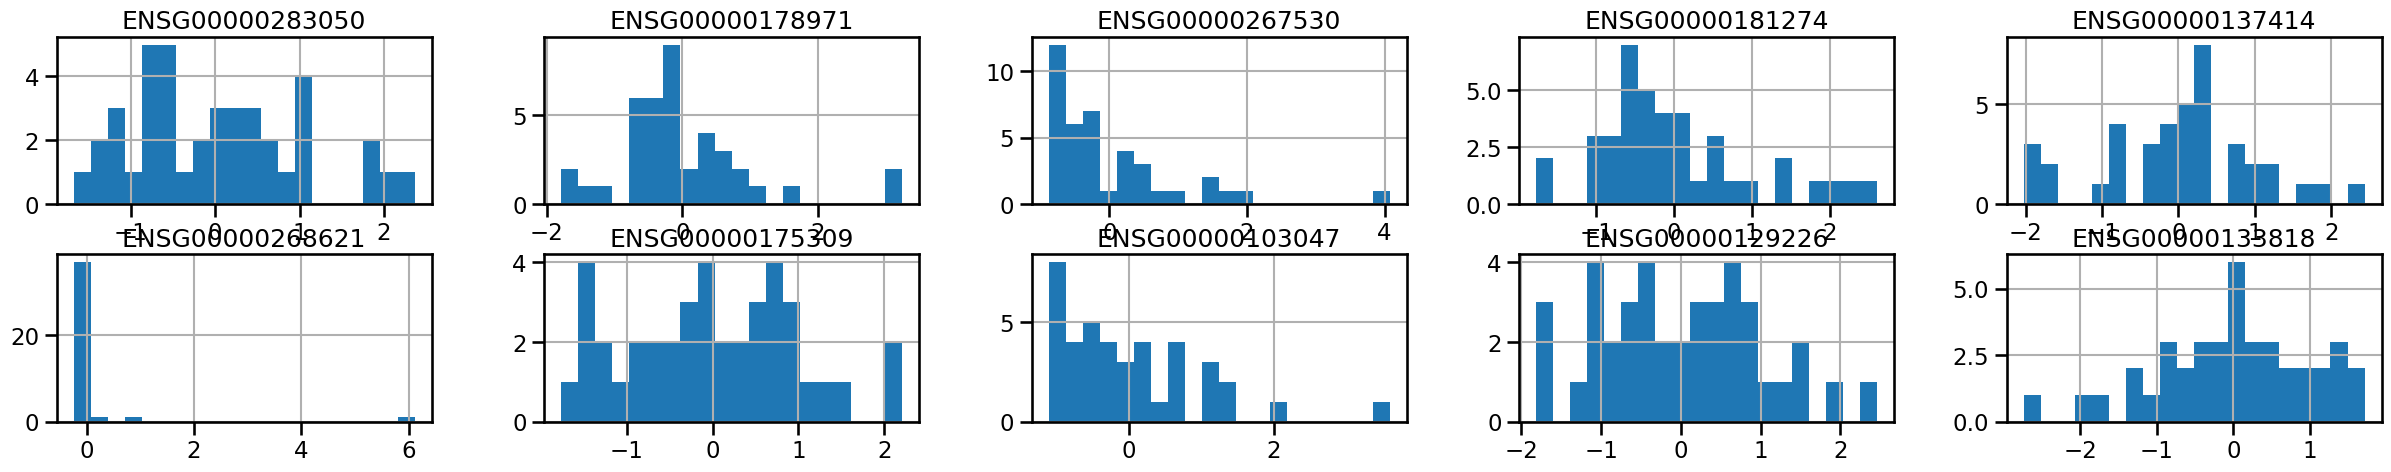

In [90]:
#data distribution after standard scaling, some skewness presist
X.iloc[:,:10].hist(bins=20,figsize=(30, 5),layout=(2,5))

In [27]:
#Load libraries for classifier and reports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#load report libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#grid search for best parameters
from sklearn.model_selection import GridSearchCV

import time

In [28]:
#train-test split, double check for splitted data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=5)
print("X_train: {}, Y_train: {}, X_test: {}, Y_test: {},".format(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape) )

X_train: (24, 3000), Y_train: (24, 1), X_test: (16, 3000), Y _test: (16, 1),


<h4>Logistic Regression</h4>

In [81]:
#Linear regresison model
logR=GridSearchCV(estimator=LogisticRegressionCV(solver='saga',n_jobs=-1),
                  param_grid={'cv':[3,5], 'penalty':['l1', 'l2', 'elasticnet']})

#train
logR_time = time.time()
logR.fit(X_train,Y_train)
logR_time_train = time.time() - logR_time
#test
logR_time = time.time()
Y_pred_logR = logR.predict(X_test)
logR_time_pred = time.time() - logR_time

<h4>KNN</h4>

In [82]:
#KNN model
knn_time = time.time()
knn=GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
                 param_grid={'n_neighbors':[3,8]})

#train
knn_time = time.time()
knn.fit(X_train,Y_train)
knn_time_train = time.time() - knn_time 
#test
knn_time = time.time()
Y_pred_knn = knn.predict(X_test)
knn_time_pred = time.time() - knn_time

<h4>SVM</h4>

In [83]:
#SVM model
svm_time = time.time()
svc=GridSearchCV(estimator=SVC(),
                 param_grid={'C':[1e-3,1e-2,1e-1,1], 'kernel':['linear', 'poly', 'rbf'], 'degree':range(2,5)})

#train
svm_time = time.time()
svc.fit(X_train,Y_train)
svm_time_train = time.time() - svm_time
#test
knn_time = time.time()
Y_pred_svm = svc.predict(X_test)
svm_time_pred = time.time() - svm_time

<h4>Decision Tree</h4>

In [84]:
#Decision tree model
dTree_time = time.time()
dTree=GridSearchCV(estimator=DecisionTreeClassifier(random_state=13),
                   param_grid={'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':range(5,50,5)})

#train
dTree_time = time.time()
dTree.fit(X_train,Y_train)
dTree_time_train = time.time() - dTree_time
#test
dTree_time = time.time()
Y_pred_dTree = dTree.predict(X_test)
dTree_time_pred = time.time() - dTree_time

<h4>Analysis of each classifiers</h4>

In [85]:
score_df = pd.DataFrame()

for i, j in enumerate([Y_pred_logR, Y_pred_knn, Y_pred_svm, Y_pred_dTree]):
    score_df[i] = [accuracy_score(Y_test,j),
                   precision_score(Y_test,j),
                   recall_score(Y_test,j),
                   f1_score(Y_test,j),
                   roc_auc_score(Y_test,j)]
score_df = score_df.T
score_df.columns=['accuracy','precision','recall','f1','auc']
score_df.index=['Logistic Regression','KNN','SVM','Decision Tree']
score_df['Training time']=[logR_time_train, knn_time_train, svm_time_train, dTree_time_train]
score_df['Prediction time']=[logR_time_pred, knn_time_pred, svm_time_pred, dTree_time_pred]
score_df

,accuracy,precision,recall,f1,auc,Training time,Prediction time
Logistic Regression,1.0000,1.0,1.0,1.000000,1.00,21.612164,0.020988
KNN,1.0000,1.0,1.0,1.000000,1.00,0.835522,0.056967
SVM,0.9375,1.0,0.9,0.947368,0.95,8.081401,8.103387
Decision Tree,0.9375,1.0,0.9,0.947368,0.95,7.195887,0.020989


In [86]:
# Display parameters for each estimators
print("Logistic Rergression: ",logR.best_estimator_)
print("KNN: ",knn.best_estimator_)
print("SVM: ",svc.best_estimator_)
print("Decision Tree: ",dTree.best_estimator_)

Logistic Rergression:  LogisticRegressionCV(cv=3, n_jobs=-1, penalty='l1', solver='saga')
KNN:  KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
SVM:  SVC(C=1, degree=2)
Decision Tree:  DecisionTreeClassifier(max_depth=5, random_state=13)


In [87]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#Y_test data
Test_Data=pd.DataFrame(Y_test.value_counts().to_list(),index=['Para','Cancer'],columns=['Counts'])
Test_Data

,Counts
Para,10
Cancer,6


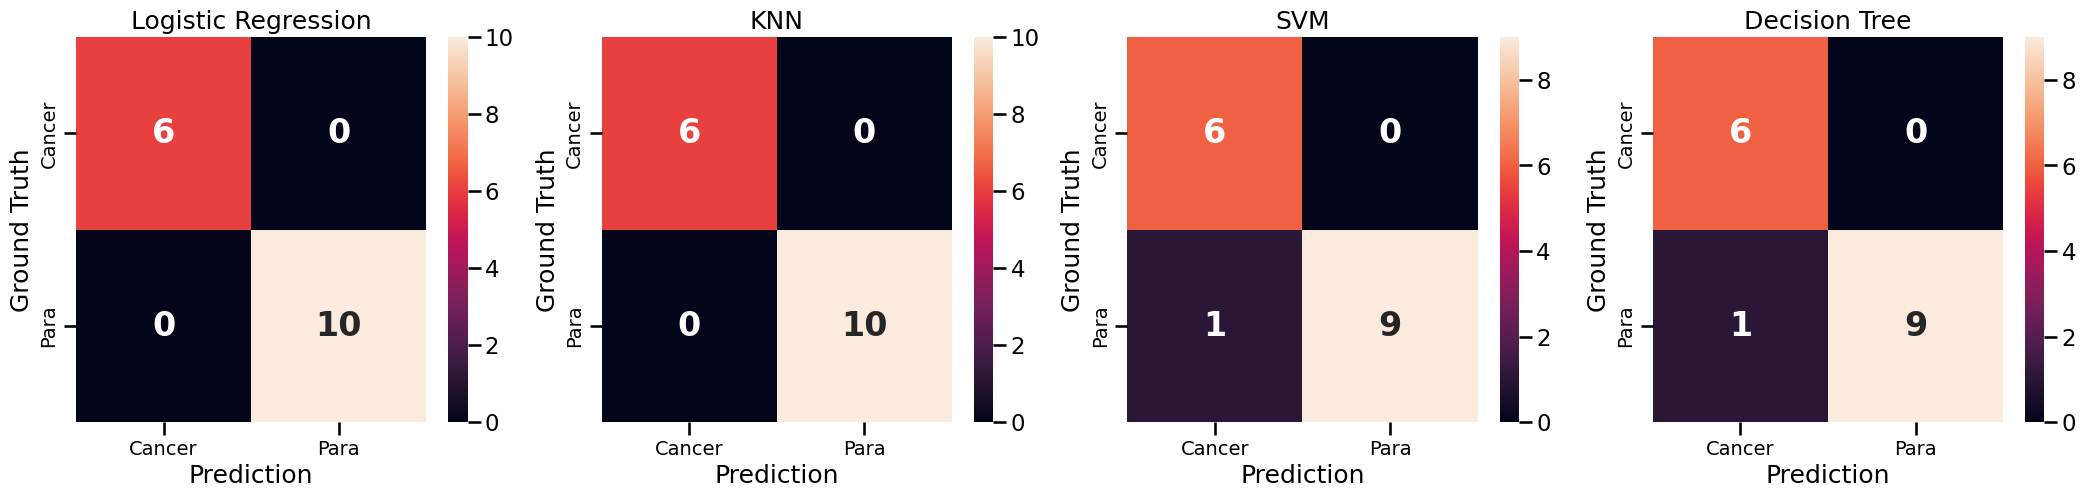

In [89]:
#plot curves for each classification methods
from sklearn.metrics import confusion_matrix
sns.set_context('talk')

fig, axes = plt.subplots(1, 4, figsize=(26,5))
for i, j in enumerate([Y_pred_logR, Y_pred_knn, Y_pred_svm, Y_pred_dTree]):
    cm = confusion_matrix(Y_test, j)
    sns.heatmap(cm, ax=axes[i], annot=True, fmt='d', annot_kws={"size": 24, "weight": "bold"})
    axes[i].set_title(score_df.index[i])
    axes[i].set_xticklabels(['Cancer','Para'], fontsize=14);
    axes[i].set_yticklabels(['Cancer','Para'], fontsize=14);
    axes[i].set_ylabel('Ground Truth', fontsize=18)
    axes[i].set_xlabel('Prediction', fontsize=18);
    

<h2>Q5: A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.</h2>

<b>Answer:</b><br>
For this data set, all 4 tested classifiers showed strong predictability.<br>
Among which, Logistic Regression and KNN perform best (highest accuracy, precision, and recall)<br>
Comparatively, KNN with 3 nearest neighbours perform fast in both training and prediction, therefore may best suit
for this data set, which contain large number of features (genes)

<h2>Q6: Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.</h2>

<b>Answer:</b><br>
Given large amount of features granted the stronger predicrbaility for all tested models: Logistic Regression, KNN, SVM, and Decision Tree.<br>
Several runs were performed, and number of random selected features/genes from 500 to 5000 were tested. The outcomes turned out to be almost identical. This implies that given high amount of features, individual feature may not play a decisive role in classification models. These also suggest the robustness of this model.<br>

<h2>Q7: Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.</h2>

<b>Answer:</b><br>
Given the KNN model is highly predictable for this data set, more data sets of similar processing steps may be applied for classification. Given the robustness(100% predictability) of this model, more gene expression profiles may be used to test the predictability of this model.  